In [53]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
def load_csv_file(file_path):
    data = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        for row in csv_reader:
            data.append(row)

    return data

In [55]:
def load_csv_files_in_folder(folder_path):
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    all_csv_data = []

    for csv_file in csv_files:
        csv_path = os.path.join(folder_path, csv_file)
        csv_data = load_csv_file(csv_path)
        all_csv_data.append((csv_file, csv_data))

    return all_csv_data

In [56]:
def extract_YT_A_data(data, keyword):
    new_data = []
    
    for row in data:
        if keyword in row:
            new_data.append(row)
    
    return new_data

In [57]:
folder_name = 'variance_shortest_hg'

In [58]:
all_csv_data = load_csv_files_in_folder(folder_name)

In [59]:
# Printing the loaded CSV data for each file
keyword = "Truck-100"
YT_A_data = []

for csv_file, csv_data in all_csv_data:
    
    data = extract_YT_A_data(csv_data, keyword)
    
    print(f"Extracted data from {csv_file} where '{keyword}' exists:")
    for row in data:
        print(row)
        YT_A_data.append(row)
    print("=" * 80)

Extracted data from result-prev_Truck_10_shortest.csv-now_Truck_1_shortest.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '402.412', '66.072', '35.212']
Extracted data from result-prev_Truck_20_shortest.csv-now_Truck_1_shortest.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '405.536', '69.556', '34.84']
Extracted data from result-prev_Truck_30_shortest.csv-now_Truck_1_shortest.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '431.28', '94.004', '35.416']
Extracted data from result-prev_Truck_40_shortest.csv-now_Truck_1_shortest.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '458.484', '121.136', '36.016']
Extracted data from result-prev_Truck_50_shortest.csv-now_Truck_1_shortest.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '511.028', '

In [60]:
original_column_names = all_csv_data[0][1][0]
column_names = [column.strip() for column in original_column_names]
print(column_names)

['Truck_id', 'Route_id', 'Origin', 'Destination', 'Total Time', 'PickupSta AT', 'DropSta AT']


In [61]:
YT_A_shortest_df = pd.DataFrame(YT_A_data, columns = column_names)
YT_A_shortest_df

,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
0,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),402.412,66.072,35.212
1,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),405.536,69.556,34.84
2,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),431.28,94.004,35.416
3,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),458.484,121.136,36.016
4,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),511.028,176.076,33.768
5,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),507.98,170.748,35.52
6,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),589.56,247.3,40.596


In [62]:
prev_YT_Num_data = [10, 20, 30, 40, 50, 60, 70]
prev_YT_Num_data_column_name = "prev_YT_Num"

In [63]:
YT_A_shortest_df[prev_YT_Num_data_column_name] = prev_YT_Num_data

In [64]:
YT_A_shortest_df

,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT,prev_YT_Num
0,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),402.412,66.072,35.212,10
1,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),405.536,69.556,34.84,20
2,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),431.28,94.004,35.416,30
3,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),458.484,121.136,36.016,40
4,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),511.028,176.076,33.768,50
5,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),507.98,170.748,35.52,60
6,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),589.56,247.3,40.596,70


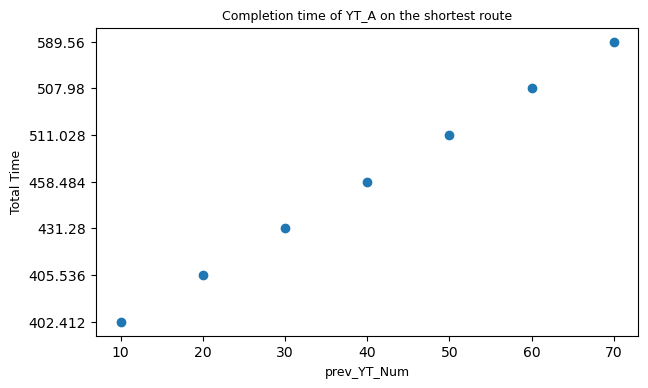

In [78]:
plt.figure(figsize=(7, 4))
plt.scatter(YT_A_shortest_df['prev_YT_Num'], YT_A_shortest_df['Total Time'])
plt.title('Completion time of YT_A on the shortest route', fontsize=9, ha='center')
plt.xlabel('prev_YT_Num', fontsize = 9)
plt.ylabel('Total Time', fontsize = 9)
plt.show()